# First Session of Stochastic Modelling
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/FirstSession.ipynb)

## Part 1: A very fast recap of Probability

From Wikipedia:

The **probability** of an event is a number that indicates how likely the event is to occur.

### Basic rules of probability:

$P(A\cup B)+P(A\cap B)=P(A)+P(B) \quad \forall A,B \in \Omega$

$0 \le P(A)\le 1 \quad \forall A \in \Omega$ 

$P(A|B)P(B)=P(A\cap B) \quad \forall A,B \in \Omega$ (Bayes law)

$P(A)=P(A|B)P(B)+P(A|B^{C})P(B^{C}) \quad \forall A,B \in \Omega$ (law of total probability)

$P(B^{C})=1-P(B) \quad \forall B\in \Omega$

If $A$ and $B$ are independent we have $$P(A \cap B)= P(A)P(B) \quad \forall A,B \in \Omega$$

### A realistic exercise

Let's do a very basic exercise (which I actually did in the last year):

It is known from the academic year 2020-2021 that a student who does his Stochastic Modelling homeworks has a chance of 90 percent to get a very good grade (between $27$ and $30$); but the chance drops to 75 percent if he doesn't do the homeworks.
Guglielmo has been very busy with other courses and figures out that he has only a 69 percent chance of doing the homeworks.
What are his chances of not getting a very good grade in the course?

Answer:
There are two important events under discussion. Let us name them.

$E$ : doing homeworks.

$F$ : getting a very good grade.

We know that $P(F|E)=0.9$, $P(F|E^{C})=0.75$ and $P(E)=0.69$

The solution is to use the law of total probability.

$P(F)=P(F|E)P(E)+P(F|E^{C})P(E^{C})$

## Part 2: A very fast recap of Random Variables

- A random variable is function $X: \Omega \rightarrow \mathbb{R}$ 
- A random variable is characterized by it's cumulative density function $F(x)=P(X\le x)$.
- A discrete random variable has a countable support and it is characterized by it's probability mass function $P(X=x)=F(x)-F(X=\max_{y\in X|F(y)< F(x)} y)$.
- A continous random variable has a noncountable support and is characterized by it's density function $f(x)=\frac{dF}{dx}$

The most important properties of a random variable are the moments
- non central moments: $E[X^{k}]=\int_{Im(X)}y^{k}f(y)dy$ if the variable is continuous or $E[X^{k}]=\sum_{y \in Im(x)}y^{k}f(y)$ if the variable is discrete
- central moments: $E[(X-E[X])^{k}]=\int_{Im(X)}(y-E[X])^{k}f(y)dy$ if the variable is continuous or $E[X^{k}]=\sum_{y \in Im(x)}(y-E[X])^{k}f(y)$ if the variable is discrete
- marginalization: $f(x)=\int_{Im(Y)}f(x,y)dy$ for continuos random variables and $P(X=x)=\sum_{Im(Y)}P(X=x,Y=y)$
- conditioning $f(x|y)=\frac{f(x,y)}{f(y)}$ for continous random variables and $P(X=x|Y=y)=\frac{P(X=x,Y=y)}{P(Y=y)}$ for discrete random variables

Examples of r.v:
- continuous: Gaussian, Exponential, Beta, UniformContinous
- discrete: Bernoulli, Binomial, Poisson


Properties of mean and variance:
$E[aX+bY]=aE[X]+bE[Y]$
$Var[aX]=a^{2}Var[X]$
$Var[X+Y]=Var[X]+Var[Y]+2Cov(X,Y)$

Some random variables are identically distributed if they have the same cdf/pdf/pgh.
There are two very important theorems in probability. Let's assume that we have a set of i.i.d  random variables $X_{i}$ with finite mean and variance, then:
- Central limit theorem: $$\frac{\sum\limits_{i=1}^{n} X_{i}-nE[X]}{\sqrt{nVar[X]}}\rightarrow Normal(0,1)$$
- Law of large numbers: $$\frac{\sum\limits_{i=1}^{n} X_{i}}{n}\rightarrow E[X]$$

## A coin tossing (AKA Monte Carlo Integral)
Let's suppose we want to see if a coin is balanced. We may use random variables. We may toss a coin a lot of times and assign to a random variable the value 1 is we get head and the value 0 if we get tail. So we get a binary variable, which is usually called Bernoulli random variable. 
$$X=\begin{cases} 1 \text{ with probability } p \\
0 \text{ with probability } 1-p \end{cases}$$

An important property of a Bernoulli random variable is that $E[X]=0*(1-p)+1*p=p$

Our coin is balanced if and only if we have $p=0.5$.

As tossing a coin is slow (and I only have one hour) we are going to simulate the tosses using scipy.

In [ ]:
#!pip  numpy matplotlib scipy dill
from scipy.stats import bernoulli #basic python importing
from tqdm import trange #Very useful function that you probably don't know
class TossingMachine():
    def __init__(self):
        self.p=0.5
        self.dist=bernoulli
    
    def toss(self):
        a=self.dist.rvs(self.p)
        if a==1:
            return "Head"
        else:
            return "Tail"

tossing_machine=TossingMachine()
print(tossing_machine.toss())

Tail


To see if our virtual coin is balanced or not we may toss a lot of times and then calculate the sample avarage. 
The sample average will approximate our probability $p$ because of the law of large numbers.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:03<00:00, 25901.15it/s]

the estimated probability is  0.49794


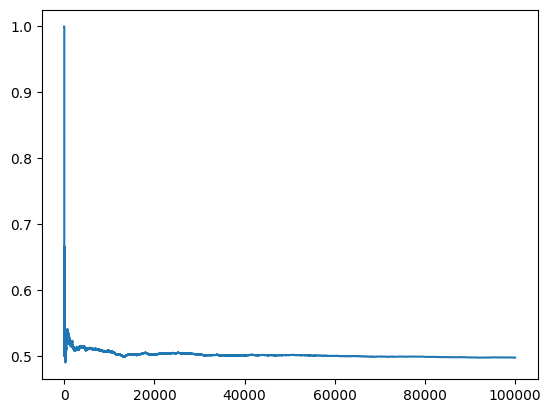

In [ ]:
X=[] #inizialization of the list
import numpy as np
import matplotlib.pyplot as plt
NUM_SAMPLES=100000
for i in trange(NUM_SAMPLES):
    tmp=tossing_machine.toss()
    if tmp=="Head":
        X.append(1)
    else:
        X.append(0)

print("the estimated probability is ", sum(X)/NUM_SAMPLES)
avarage_mean=np.cumsum(X)/np.cumsum(np.ones(NUM_SAMPLES))
plt.plot(np.arange(NUM_SAMPLES)+1,avarage_mean)

We got a value near $0.5$. So we are happy :-) .

## The queen of all r.v: the Gaussian R.V. 
### but republic is approaching ....


The Gaussian distribution is characterized by it's mean $\mu$ and it's variance $\sigma^{2}$.
It has the following pdf
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-(\frac{x-\mu}{\sigma})^{2}}$$
The parameter $\sigma$ is called standard deviation. 
The Gaussian distribution is particulary important because of the following two properties:
- it is the limit distribution of the central limit theorem
- it is the only distribution with finite variance such that all linear combinations of **independent** random variables from it's distribution have it's distribution:
$$ X_{i}\sim N(\mu_{i},\sigma_{i}^{2})$$ 
$$\sum_{i=1}^{n} a_{i}X_{i}\sim N(\sum\limits_{i=1}^{n} a_{i}\mu_{i},\sum\limits_{i=1}^{n} a_{i}^{2}\sigma_{i}^{2})$$
These two properties are strongly linked with each other, for a proof of this I invite to follow the course of Information Theory.

Let's now look at scipy stats function.


In [ ]:
from scipy.stats import norm #normal random variable
distribution=norm(1,4) #mean=1, standard deviation=4,not variance!!!
print("P(X<=0) is, ",distribution.cdf(0))
print("Variance of X is", distribution.var())
print("Mean of X is", distribution.mean())
print("f(0) is",distribution.pdf(0))
print("Sampling from Normal is", distribution.rvs())

P(X<=0) is,  0.4012936743170763
Variance of X is 16.0
Mean of X is 1.0
f(0) is 0.09666702920071232
Sampling from Normal is -1.5705329900003977


What is the standard deviation of the sum of two independent normal random variable of standard deviation 3 and 4? 5 because you have to do $\sqrt{3^{2}+4^{2}}=5$

## Notable discrete random variables
$$
\begin{array}{|c|c|c|c|c|c|}
\hline x & x \text { Counts } & P.M.F & \text { Values of } X & E(x) & V(x) \\
\hline \begin{array}{l}
\text { Discrete } \\
\text { uniform }
\end{array} & \begin{array}{l}
\text { Outcomes that are } \\
\text { equally likely (finite) }
\end{array} & \frac{1}{b-a+1} & a \leq x \leq b & \frac{b+a}{2} & \frac{(b-a+2)(b-a)}{12} \\
\hline \text { Bernoulli } & \begin{array}{l}
\text { Number of sucesses } \\
\text { in }  \text { 1 fixed trial }
\end{array} & \left(\begin{array}{l}
n \\
x
\end{array}\right) p^{x}(1-p)^{1-x} & x=0,1 & p & p(1-p) \\
\hline \text { Binomial } & \begin{array}{l}
\text { Number of sucesses } \\
\text { in } n \text { fixed trials }
\end{array} & \left(\begin{array}{l}
n \\
x
\end{array}\right) p^x(1-p)^{n-x} & x=0,1, \ldots, n & np & n p(1-p) \\
\hline \text { Poisson } & \begin{array}{l}
\text { Number of arrivals in } \\
\text { a fixed time period }
\end{array} & \frac{e^{-\lambda} \lambda^x}{x !} & x=0,1,2, \ldots & \lambda & \lambda \\
\hline \text { Geometric } & \begin{array}{l}
\text { Number of trials up } \\
\text { through 1st success }
\end{array} & (1-p)^{x-1} p & x=1,2,3, \ldots & \frac{1}{p} & \frac{1-p}{p^2} \\
\hline \begin{array}{l}
\text { Negative } \\
\text { Binomial }
\end{array} & \begin{array}{l}
\text { Number of trials up } \\
\text { through kth success }
\end{array} & \left(\begin{array}{l}
x-1 \\
k-1
\end{array}\right)(1-p)^{x-k} p^k & 0^k \quad x=k, k+1, \ldots & \frac{k}{p} & \frac{k(1-p)}{p^2} \\
\hline \begin{array}{c}
\text { Hyper - } \\
\text { geometric }
\end{array} & \begin{array}{l}
\text { Number of marked } \\
\text { individuals in } \\
\text { sample taken } \\
\text { without replacement }
\end{array} & \frac{\left(\begin{array}{l}
M \\
x
\end{array}\right)\left(\begin{array}{l}
N-M \\
n-x
\end{array}\right)}{(N)} & \begin{array}{c}
\max (0, M+n-N) \\
\leq x \leq \min (M, n)
\end{array} & n * \frac{M}{N} & \frac{\mathrm{nM}(N-M)(N-n)}{N^2(N-1)} \\
\hline
\end{array}
$$

## Notable Continous distribution
$$
\begin{array}{cccccc}
\hline X & X \text { Measures } & P.D.F & \text { Values of } X & E(x) & \boldsymbol{V}(\mathbf{x}) \\
\hline \begin{array}{c}
\text { Continuous } \\
\text { uniform }
\end{array} & \begin{array}{c}
\text { Outcomes with equal } \\
\text { density (continuous) }
\end{array} & \frac{1}{\mathrm{~b}-\mathrm{a}} & \mathrm{a} \leq \mathrm{x} \leq \mathrm{b} & \frac{\mathrm{b}+\mathrm{a}}{2} & \frac{(\mathrm{b}-\mathrm{a})^2}{12} \\
\hline \text { Exponential } & \begin{array}{c}
\text { Time between events; } \\
\text { time until an event }
\end{array} & \lambda \mathrm{e}^{-\lambda x} & x \geq 0 & \frac{1}{\lambda} & \frac{1}{\lambda^2} \\
\hline \text { Erlang } & 
\text { time until k events occur}
 & \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1) !} & x \geq 0 & \frac{k}{\lambda} & \frac{k}{\lambda^2} \\
\hline \text { Normal } & \begin{array}{c}
\text { Values with a bell-shaped } \\
\text { distribution (continuous) }
\end{array} & \frac{1}{\sigma \sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} & -\infty<\mathrm{x}<\infty & \mu & \sigma \\
\hline \text { Beta } & 
\text {order statistics}
 & \frac{\Gamma(\alpha+\beta)x^{\alpha-1}(1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)}& 0 \le x \le 1 &\frac{\alpha}{\alpha+\beta} & \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}\\
\hline \text { Gamma } & 
\text {I have no idea}
 & \frac{1}{\Gamma(k) \theta^k} x^{k-1} e^{-\frac{x}{\theta}}& x\ge 0 &k\theta & k\theta^{2}\\
\hline
\end{array}
$$


## Histogram and Kernel Density Estimation

Suppose that you have a blackbox random variable from which you can sample and you want to estimate it's pdf.

You could start by plotting the histogram. To plot an histogram we need to choose a number of bins:
- with a small number of bins there is a very low resolution
- with a high number of bins there is a lot of variance

In [ ]:
import dill
import scipy
import matplotlib.pyplot as plt
blackboxrv=dill.load(open( "blackbox.p", "rb" ))
dataset=blackboxrv.sample(50000)
a=plt.hist(dataset,density=True,bins=2)

In [ ]:
dataset=blackboxrv.sample(50000)
a=plt.hist(dataset,density=True,bins=10000)

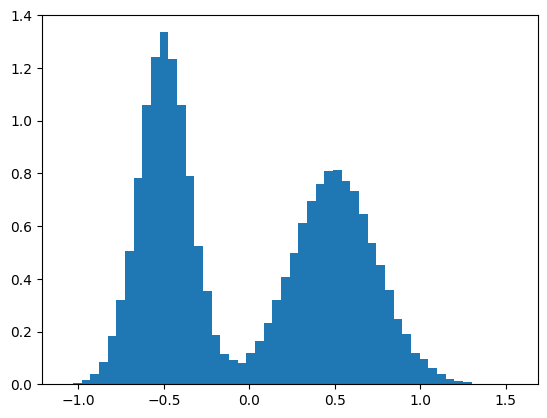

In [ ]:
dataset=blackboxrv.sample(50000)
a=plt.hist(dataset,density=True,bins="scott") #use scott optimal binning

The random variable is clearly bimodal. Let's try to estimate the pdf using a KDE estimation, which basically interpolates using a lot of gaussian distributions using kernels (for details in this technique see the Unsupervised Learning course).

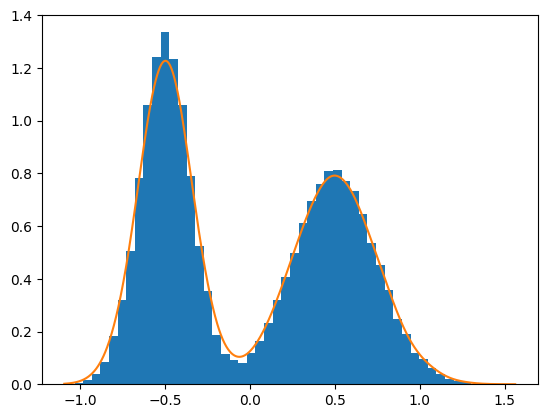

In [ ]:
import numpy as np
epsilon=0.01
kde=scipy.stats.gaussian_kde(dataset)
a=plt.hist(dataset,density=True,bins="scott")
x=np.min(dataset)-epsilon+(np.max(dataset)-np.min(dataset)+2*epsilon)*np.arange(1000)/1000
b=plt.plot(x,kde.pdf(x))

The KDE estimate is good.

Why is the probability of -0.5 greater then one? Because this is the pdf and it's not a probability.